In [1]:
from google.colab import drive

drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [2]:
# Merge two dataset (food_data1 & food_data2)
# Convert object type to date_time in the first dataset


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from scipy.stats import chi2_contingency
from scipy import stats
import datetime
import matplotlib.ticker as mtick

food_data1 = pd.read_csv("/content/MyDrive/MyDrive/food_data1.csv")

food_data2 = pd.read_excel("/content/MyDrive/MyDrive/food_data2.xlsx")

food_data1['Dt_Customer'] = pd.to_datetime(food_data1['Dt_Customer'])

df = food_data1.merge(food_data2, how = 'outer')

# There are two different datasets for a food company. They were merged.
# The data includes customer information (their birth year, income,
# kids and teenagers at home, education level, enrollment date to the company
# as a customer,), their amount spent for the different products in the
# last two years, number of days since their last purchase,
# if they complain in the last two years, their answer to the different campaigns
# and to the last campaign. In addition, the customer enrollment data was
# converted to datetime to analyze the data easier.


In [3]:
# Rename few columns.
# Show the name and the type of the columns

df = df.rename(columns={"Year_Birth": "Birth_Year", "Income" : "Yearly_Income", "Kidhome": "Kid_at_Home", "Teenhome": "Teen_at_Home",
                        "Dt_Customer" : "Customer_Enrollment_Date","Recency" : "Days_Since_Last_Purchase",
                        "MntWines": "Spent_for_Wines", "MntFruits" : "Spent_for_Fruits", "MntMeatProducts" : "Spent_for_Meat",
                        "MntFishProducts" : "Spent_for_Fish", "MntSweetProducts" : "Spent_for_Sweet",
                        "MntGoldProds" : "Spent_for_Gold", "Complain": "Complaint_Last_Two_Years"})

df.dtypes

# Some of the columns were renamed to make them more understable for the readers.

ID                                   int64
Birth_Year                           int64
Education                           object
Marital_Status                      object
Yearly_Income                      float64
Kid_at_Home                          int64
Teen_at_Home                         int64
Customer_Enrollment_Date    datetime64[ns]
Days_Since_Last_Purchase             int64
Spent_for_Wines                      int64
Spent_for_Fruits                     int64
Spent_for_Meat                       int64
Spent_for_Fish                       int64
Spent_for_Sweet                      int64
Spent_for_Gold                       int64
NumDealsPurchases                    int64
NumWebPurchases                      int64
NumCatalogPurchases                  int64
NumStorePurchases                    int64
NumWebVisitsMonth                    int64
AcceptedCmp3                         int64
AcceptedCmp4                         int64
AcceptedCmp5                         int64
AcceptedCmp

In [4]:
# Delete any space in colunms name (Income has space)

df.columns = df.columns.str.replace(' ', '')

# The name of " Income" column had space in the beginning, therefore
# the space was deleted as part of data cleaning.

In [5]:
# Get the name of the columns

df.columns

# The name of the columns were inferred from the data as part of descriptive analysis.

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Yearly_Income',
       'Kid_at_Home', 'Teen_at_Home', 'Customer_Enrollment_Date',
       'Days_Since_Last_Purchase', 'Spent_for_Wines', 'Spent_for_Fruits',
       'Spent_for_Meat', 'Spent_for_Fish', 'Spent_for_Sweet', 'Spent_for_Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complaint_Last_Two_Years', 'Response'],
      dtype='object')

In [6]:
# Get the age of the customer from their year of birth


current_year = df.Customer_Enrollment_Date.max().year

df['Age'] = current_year - df['Birth_Year']

# Age column was created from customers' year of birth in order to
# use the infomation as part of descriptive and explorative data analyses.

In [7]:
# Get the tenurity of the customer from their year of enrollment

current_date = pd.to_datetime(df['Customer_Enrollment_Date']).max()

df['Customer_Tenure_In_Days'] = (current_date - pd.to_datetime(df['Customer_Enrollment_Date'])).dt.days

# Customer tenurity was calculated from enrollment year and a column was created
# to use the infomation as part of descriptive and explorative data analyses.

In [8]:
# Get the total acceptance rate of the campaigns

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                    'AcceptedCmp4', 'AcceptedCmp5', 'Response']

df['Total_Acceptance'] = df[campaign_columns].sum(axis=1)

# Total acceptance rate of the campaigns was calculated an a column was created
# in order to use the infomation as part of descriptive and explorative data analysis.


In [9]:
# Add to data an index column

column_index = range(0,2240)

df['Index'] = column_index[:len(df)]

df = df[['Index'] + [col for col in df.columns if col != 'Index']]

df.shape

# An index column for customers was created in order to make the data more structured.

(2240, 31)

In [10]:
# Identify and drop outliers in the Birth Year column

df = df.drop(df[df['Birth_Year'] < 1900].index)

df.shape

# Outliers in the birth year column was identified and dropped as part of data
# cleaning in order to get more reliable results.

(2238, 31)

In [11]:
# Identify number of null rows for each column

df.isnull().sum().sort_values(ascending=False)

# Number of null rows for each column were identified
# to handle null data.

Yearly_Income               24
Index                        0
NumDealsPurchases            0
Customer_Tenure_In_Days      0
Age                          0
Response                     0
Complaint_Last_Two_Years     0
AcceptedCmp2                 0
AcceptedCmp1                 0
AcceptedCmp5                 0
AcceptedCmp4                 0
AcceptedCmp3                 0
NumWebVisitsMonth            0
NumStorePurchases            0
NumCatalogPurchases          0
NumWebPurchases              0
Spent_for_Gold               0
ID                           0
Spent_for_Sweet              0
Spent_for_Fish               0
Spent_for_Meat               0
Spent_for_Fruits             0
Spent_for_Wines              0
Days_Since_Last_Purchase     0
Customer_Enrollment_Date     0
Teen_at_Home                 0
Kid_at_Home                  0
Marital_Status               0
Education                    0
Birth_Year                   0
Total_Acceptance             0
dtype: int64

In [12]:
# Drop rows containing null data

df = df.dropna()

# The null rows were dropped from the data
# to get more reliable results in the desciptive and
# explorative analyses.

In [13]:
# Drop duplicated rows if there are

df = df.drop_duplicates()

# The duplicated rows were dropped from the data
# to get more reliable results in the desciptive and
# explorative analyses.

In [14]:
# Normalize Yearly Income by using Z-score

df['z_score'] = (df.Yearly_Income - df.Yearly_Income.mean()) / df.Yearly_Income.std()

df_no_outliers =df[np.abs(df['z_score']) <= 3]
df_no_outliers = df_no_outliers.drop(columns=['z_score'])
df = df_no_outliers

# Yearly income was normalized with Z-Score and outliers were dropped
# to get more reliable results in the desciptive and
# explorative analyses.

In [15]:
# Create Income Interval Column

income_column = []

for row in df.Yearly_Income:
  if 0 < row <= 10000:
    income_column.append("0-10000")
  elif 10000 <= row < 20000:
    income_column.append("10000-20000")
  elif 20000 <= row < 30000:
    income_column.append("20000-30000")
  elif 30000 <= row < 40000:
    income_column.append("30000-40000")
  elif 40000 <= row < 50000:
    income_column.append("40000-50000")
  elif 50000 <= row < 60000:
    income_column.append("50000 60000")
  elif 60000 <= row < 70000:
    income_column.append("60000-70000")
  elif 70000 <= row < 80000:
    income_column.append("70000-80000")
  elif 80000 <= row < 90000:
    income_column.append("80000-90000")
  elif 90000 <= row < 100000:
    income_column.append("90000-100000")
  else:
    income_column.append("More than 100000")

income_column.sort()

df['Income_Intervals'] = income_column

# Customers' income interval column were created to make the analyses easier.

In [16]:
# Identify the number of rows and columns

df.shape

# The number of rows and columns were identified as part of
# descriptive analysis.Now there is 2206 rows and 32 columns
# in the data.


(2206, 32)

In [17]:
# Identify columns - updated version

df.columns

# The columns were identified as part of
# descriptive analysis.

Index(['Index', 'ID', 'Birth_Year', 'Education', 'Marital_Status',
       'Yearly_Income', 'Kid_at_Home', 'Teen_at_Home',
       'Customer_Enrollment_Date', 'Days_Since_Last_Purchase',
       'Spent_for_Wines', 'Spent_for_Fruits', 'Spent_for_Meat',
       'Spent_for_Fish', 'Spent_for_Sweet', 'Spent_for_Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complaint_Last_Two_Years', 'Response', 'Age',
       'Customer_Tenure_In_Days', 'Total_Acceptance', 'Income_Intervals'],
      dtype='object')

In [18]:
# Get important statistics from the data

df.describe()

# The statisctics of columns (count, mean, min number, max number, %25, %50, %75,
# standard deviation) were gathered as part of descriptive analysis.


,Index,ID,Birth_Year,Yearly_Income,Kid_at_Home,Teen_at_Home,Customer_Enrollment_Date,Days_Since_Last_Purchase,Spent_for_Wines,Spent_for_Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complaint_Last_Two_Years,Response,Age,Customer_Tenure_In_Days,Total_Acceptance
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206,2206.000000,2206.000000,2206.000000,...,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,1122.411151,5586.456482,1968.873073,51615.303264,0.442430,0.506346,2013-07-10 07:36:16.971894784,49.031732,306.032638,26.393926,...,0.073889,0.074343,0.072983,0.064370,0.013599,0.009519,0.150952,45.126927,353.683137,0.450136
min,0.000000,0.000000,1900.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,567.250000,2817.750000,1959.000000,35196.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,180.000000,0.000000
50%,1121.500000,5458.500000,1970.000000,51277.000000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,177.500000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,355.500000,0.000000
75%,1678.750000,8417.500000,1977.000000,68279.250000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,506.500000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,529.000000,1.000000
max,2239.000000,11191.000000,1996.000000,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,699.000000,5.000000
std,642.668729,3247.161301,11.794738,20710.823073,0.537141,0.544363,NaN,28.945126,337.474244,39.777834,...,0.261650,0.262387,0.260167,0.245466,0.115847,0.097124,0.358083,11.794738,202.524468,0.893924


In [19]:
# Get the name of the columns, total non-null values in these columns and the type of the columns

df.info()

# The name of the columns, total non-null values in these columns and the type of the columns were
# gathered as part of descriptive analysis. Now, there is no null data and we have 27 integer,
# 1 float, 3 object columns and 1 date type column.


<class 'pandas.core.frame.DataFrame'>
Index: 2206 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     2206 non-null   int64         
 1   ID                        2206 non-null   int64         
 2   Birth_Year                2206 non-null   int64         
 3   Education                 2206 non-null   object        
 4   Marital_Status            2206 non-null   object        
 5   Yearly_Income             2206 non-null   float64       
 6   Kid_at_Home               2206 non-null   int64         
 7   Teen_at_Home              2206 non-null   int64         
 8   Customer_Enrollment_Date  2206 non-null   datetime64[ns]
 9   Days_Since_Last_Purchase  2206 non-null   int64         
 10  Spent_for_Wines           2206 non-null   int64         
 11  Spent_for_Fruits          2206 non-null   int64         
 12  Spent_for_Meat           

In [20]:
# Identify number of unique values in the columns

df.nunique()

# # The number of unique values in the columns were identified
# as part of descriptive analysis. The categories of education level, and the marital
# status can be explored further.


Index                       2206
ID                          2206
Birth_Year                    57
Education                      5
Marital_Status                 8
Yearly_Income               1964
Kid_at_Home                    3
Teen_at_Home                   3
Customer_Enrollment_Date     662
Days_Since_Last_Purchase     100
Spent_for_Wines              775
Spent_for_Fruits             158
Spent_for_Meat               551
Spent_for_Fish               182
Spent_for_Sweet              176
Spent_for_Gold               212
NumDealsPurchases             15
NumWebPurchases               15
NumCatalogPurchases           13
NumStorePurchases             14
NumWebVisitsMonth             16
AcceptedCmp3                   2
AcceptedCmp4                   2
AcceptedCmp5                   2
AcceptedCmp1                   2
AcceptedCmp2                   2
Complaint_Last_Two_Years       2
Response                       2
Age                           57
Customer_Tenure_In_Days      662
Total_Acce

In [21]:
# Idetify unique values in Education and Marital Status

print(df['Education'].unique())
print(df["Marital_Status"].unique())

# The unique values in Education and Marital Status were identified
# as part of descriptive anaylsis.


['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [22]:
# Replace "Alone" and "Yolo(You Live Only Once)" with "Single" in Marital Status

df["Marital_Status"] = df["Marital_Status"].str.replace('Alone','Single')
df["Marital_Status"] = df["Marital_Status"].str.replace('YOLO','Single')

print(df["Marital_Status"].unique())

# Rows including "Alone" and "Yolo" were replaced with "Single" in Marital Status
# since they have the same meaning in the data.

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Absurd']


In [23]:
# Remove the rows contain Absurd in Marital Status

mask = df['Marital_Status'] == 'Absurd'

df = df.drop(df[df["Marital_Status"]== "Absurd"].index)

# The rows contain "Absurd" in Marital Status were
# deleted as part of data cleaning.

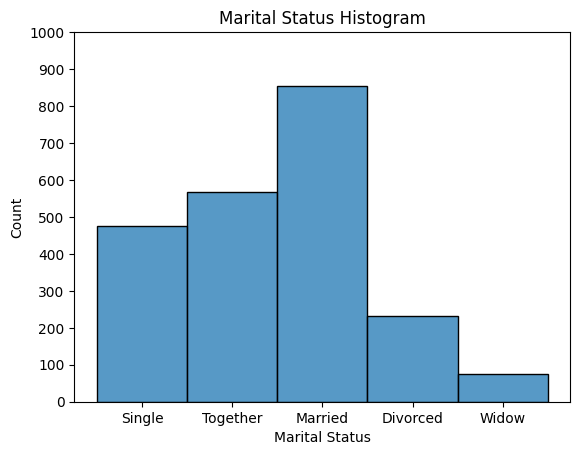

In [24]:
# Create an Histogram Graph for Marital Status

sns.histplot(data=df, x="Marital_Status")
plt.title("Marital Status Histogram")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.ylim(0, 1000)
plt.yticks(range(0,1100,100))
print()

# An histogram graph for Marital Status was created to be able to
# understand the descriptives. We can see that married customers take up a significant
# share in our data, followed by customers with a relationship and single customers.


Response
0    1872
1     332
Name: count, dtype: int64


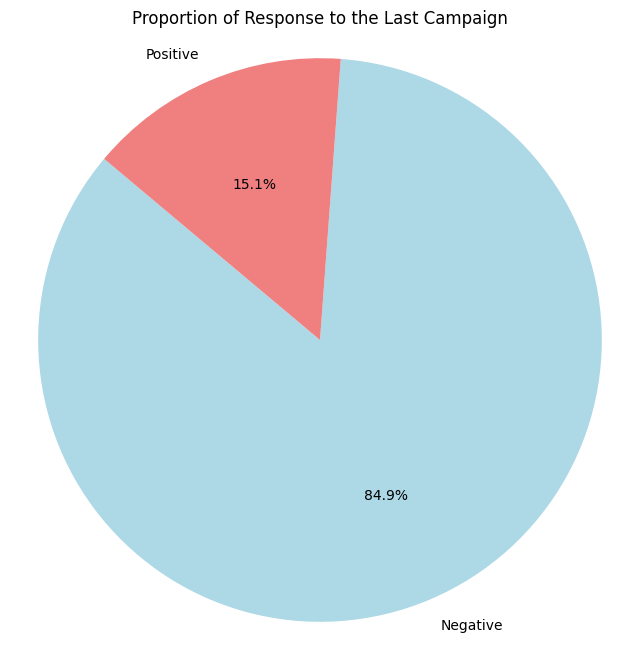

In [25]:
# Calculate the proportion of positive response to the last campaign

overall_counts = df.Response.value_counts()

print(overall_counts)

response_proportion = overall_counts[1] / overall_counts.sum()

# Create a pie chart
labels = ['Negative', 'Positive']
sizes = [overall_counts[0], overall_counts[1]]
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Response to the Last Campaign')
plt.axis('equal')
plt.show()

# The proportion of positive responses to the last campaign was calculated. We
# can see that %15.1 of the customers accepted our last campaign.


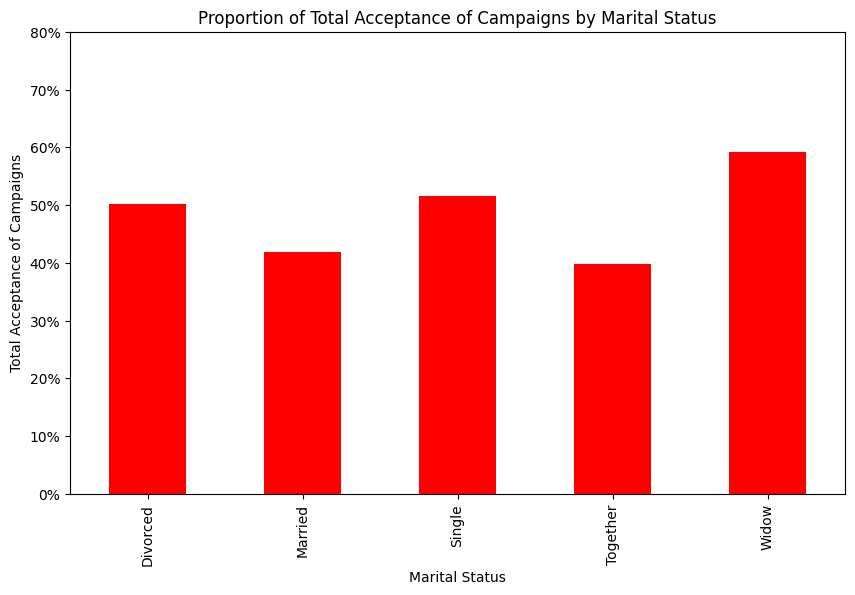

In [26]:
# Calculate proportion of total acceptance of campaigns by Marital Status

acceptance_counts_by_marital_status = df.groupby('Marital_Status')['Total_Acceptance'].sum()

total_acceptance_by_marital_status = df.groupby('Marital_Status')['Total_Acceptance'].count()

acceptance_proportion_by_marital_status = acceptance_counts_by_marital_status / total_acceptance_by_marital_status

# Create a bar plot
plt.figure(figsize=(10, 6))
acceptance_proportion_by_marital_status.plot(kind='bar', color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # Set the maximum value for percentage
plt.title('Proportion of Total Acceptance of Campaigns by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Acceptance of Campaigns')
plt.ylim(0, 0.8)
plt.show()


# The proportion of positive responses to the last campaign according to the marital status
# were calculated as part of explorative analysis. It was shown with a bar plot.

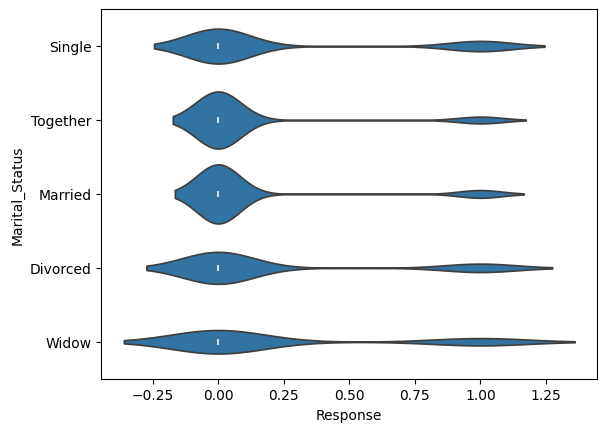

In [27]:
# Show the relationship between Response to Last Campaign and Marital Status by
# using a Violinplot

sns.violinplot(x="Response", y="Marital_Status", data=df)
plt.show()

# Violinplot was also used to the understand the relationship between Response
# to Last Campaign and Marital Status


In [28]:
# Calculate a Chi-square statistics for the relationship between Marital Status and
# Total Acceptance of Campaigns

contingency_table_1 = pd.crosstab(df['Marital_Status'], df['Total_Acceptance'])

# Perform Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table_1)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}"),
print(f"Degrees of freedom: {dof}")

# A Chi-square statistic test was calculated to determine the relationship between
# marital Status and total acceptance of campaigns as part of explorative analysis.
# p value is > 0.05, therefore, it can be conluded that there is no siginificant
# relationship between marital status and total acceptance of campaigns.

Chi-square statistic: 21.999964751929234
P-value: 0.34051255512614115
Degrees of freedom: 20


In [29]:
# Calculate a Chi-square statistics for the relationship between Marital Status and
# Response to the last Campaign

contingency_table_2 = pd.crosstab(df['Marital_Status'], df['Response'])

# Perform Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table_2)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}"),
print(f"Degrees of freedom: {dof}")

# Another Chi-square statistic test was calculated to determine the relationship between
# marital status and response to the last campaign as part of an explorative analysis.
# p value is < 0.05, therefore, it can be conluded that there is a significant
# relationship between marital status and response to the last campaign.

Chi-square statistic: 49.75615728266045
P-value: 4.059941296120542e-10
Degrees of freedom: 4


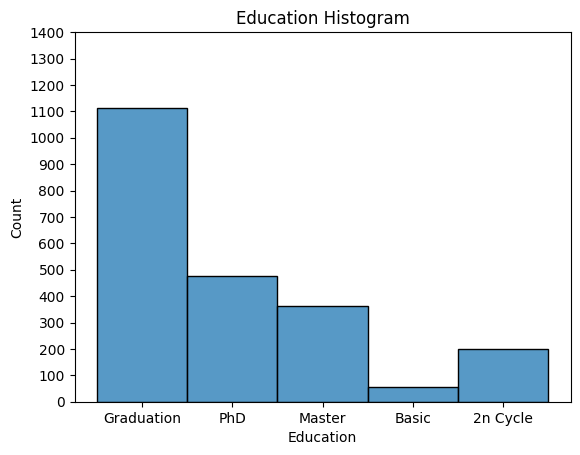

In [30]:
# Calculate an Histogram Graph for Education Level

sns.histplot(data=df, x="Education")
plt.title("Education Histogram")
plt.xlabel("Education")
plt.ylabel("Count")
plt.yticks(range(0,1500,100))
print()


# An histogram graph for Education was created to be able to
# understand the descriptives. We can see that bachelor graduates take up a significant
# share in our data, followed by master and PHD graduates.

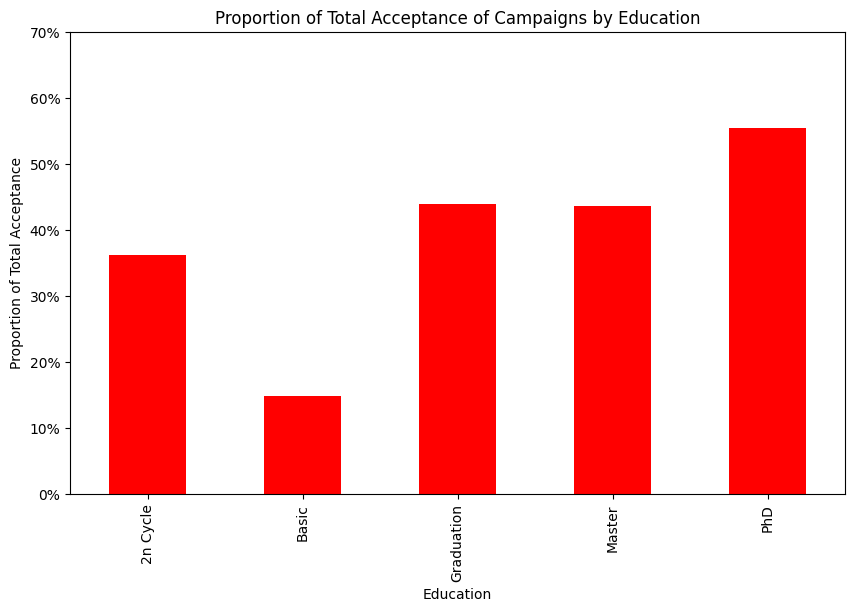

In [31]:
# Calculate proportion of total acceptance of campaigns by Education Level

acceptance_counts_by_education = df.groupby('Education')['Total_Acceptance'].sum()

total_acceptance_by_education = df.groupby('Education')['Total_Acceptance'].count()

acceptance_proportion_by_education = acceptance_counts_by_education / total_acceptance_by_education

# Create a bar plot
plt.figure(figsize=(10, 6))
acceptance_proportion_by_education.plot(kind='bar', color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # Set the maximum value for percentage
plt.title('Proportion of Total Acceptance of Campaigns by Education')
plt.xlabel('Education')
plt.ylabel('Proportion of Total Acceptance')
plt.ylim(0, 0.7)
plt.show()


# The proportion of total positive responses to the campaigns according to education level
# were calculated as part of explorative analysis. It was shown with a bar plot.

In [32]:
# Calculate a Chi-square statistics for the relationship between Education Level and
# Total Acceptance of Campaigns

contingency_table_3 = pd.crosstab(df['Education'], df['Total_Acceptance'])

# Perform Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table_3)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}"),
print(f"Degrees of freedom: {dof}")

# A Chi-square statistic test was calculated to determine the relationship between
# education level and total acceptance of campaigns as part of explorative analysis.
# p value is > 0.05, therefore, it can be conluded that there is no siginificant
# relationship between education level and total acceptance of campaigns.

Chi-square statistic: 26.49211391787158
P-value: 0.1501670313163349
Degrees of freedom: 20


In [33]:
# Perfom a Chi-square test to analyze the relationship between Education Level and
# Response to the Last Campaign

contingency_table_1 = pd.crosstab(df['Education'], df['Response'])

# Perform Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table_1)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}"),
print(f"Degrees of freedom: {dof}")

# Another Chi-square statistic test was calculated to determine the relationship between
# education level and response to the last campaign as part of explorative analysis.
# p value is < 0.05, therefore, it can be conluded that there is a significant
# relationship between education level and response to the last campaign.

Chi-square statistic: 23.991956593084325
P-value: 8.017183023481722e-05
Degrees of freedom: 4


<Axes: xlabel='Customer_Tenure_In_Days', ylabel='Density'>

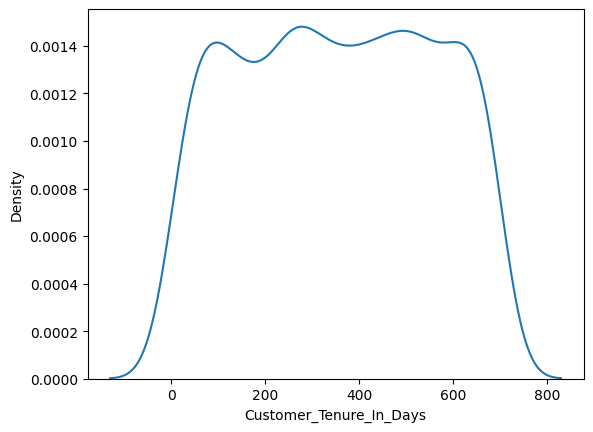

In [34]:
# Density Plot for Customer Tenurity in Days

sns.kdeplot(data=df, x="Customer_Tenure_In_Days")

# Density ploy for Customer Tenurity was implemented for
# descriptive analysis purposes.

In [35]:
# Identify if there is a statisticaly significant correlation between
# Custome Tenurity and Response to the Last Campaign

from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df['Customer_Tenure_In_Days'], df['Response'])

print(f"Point-Biserial Correlation: {corr}")
print(f"P-value: {p_value}")

# Point-Biserial Correlation was implemented to see if there is a relationship
# between Custome Tenurity and Response to the Last Campaign. p value is < 0.05,
# therefore, it can be conluded there is a significant
# relationship between customer tenurity and response to the last campaign.

Point-Biserial Correlation: 0.19566454820877288
P-value: 1.855325294014346e-20


<Axes: xlabel='Age', ylabel='Density'>

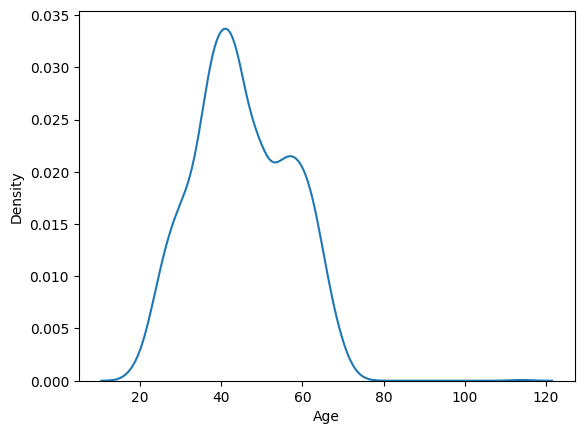

In [36]:
# Create Kde Plot for Customer Age

sns.kdeplot(data=df, x="Age")

# KDE Plot was created to see the distribution of Age in our data.

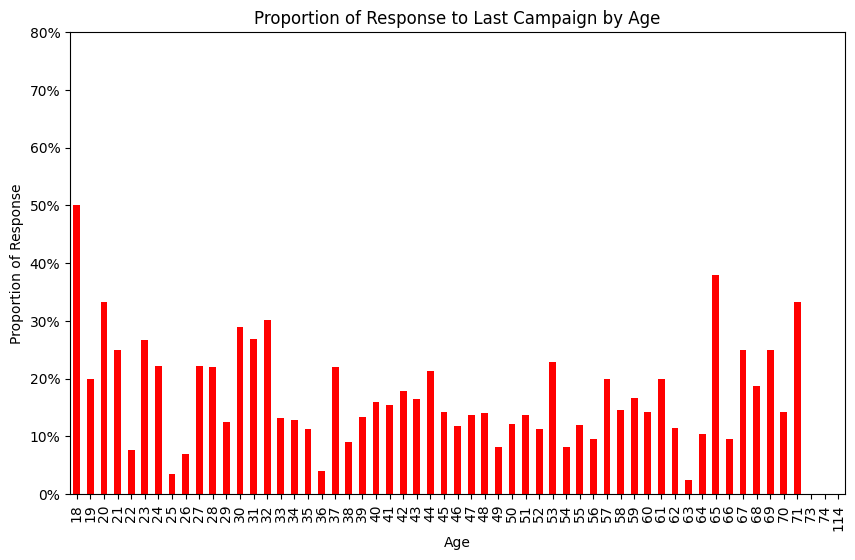

In [37]:
# Calculate proportion of response to last campaign by Age

response_counts_by_age = df.groupby('Age')['Response'].sum()

total_response_by_age = df.groupby('Age')['Response'].count()

response_proportion_by_age = response_counts_by_age / total_response_by_age

# Create a bar plot
plt.figure(figsize=(10, 6))
response_proportion_by_age.plot(kind='bar', color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # Set the maximum value for percentage
plt.title('Proportion of Response to Last Campaign by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Response')
plt.ylim(0, 0.8)
plt.show()

# The proportion of positive responses to the last campaign according to age
# were calculated as part of an explorative analysis. It was shown with a bar plot.

In [38]:
# Identify if there is a statisticaly significant correlation between
# Age and Response to the Last Campaign

from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df['Age'], df['Response'])

print(f"Point-Biserial Correlation: {corr}")
print(f"P-value: {p_value}")

# Point-Biserial Correlation was implemented to see if there is a relationship
# between Age and Response to the Last Campaign. p value is > 0.05,
# therefore, it can be conluded there is no significant
# relationship between age and response to the last campaign.

Point-Biserial Correlation: -0.019913214819125384
P-value: 0.3500854366111601


In [39]:
# Identify if there is a statisticaly significant correlation between
# Age and Total Acceptance of the Campaigns

corr, p_value = pointbiserialr(df['Age'], df['Total_Acceptance'])

print(f"Point-Biserial Correlation: {corr}")
print(f"P-value: {p_value}")


# Point-Biserial Correlation was implemented to see if there is a relationship
# between Age and total acceptance of the campaigns. p value is > 0.05,
# therefore, it can be conluded there is no significant
# relationship between age and total acceptance of the campaigns.

Point-Biserial Correlation: -0.005788568243497362
P-value: 0.7859274926457515


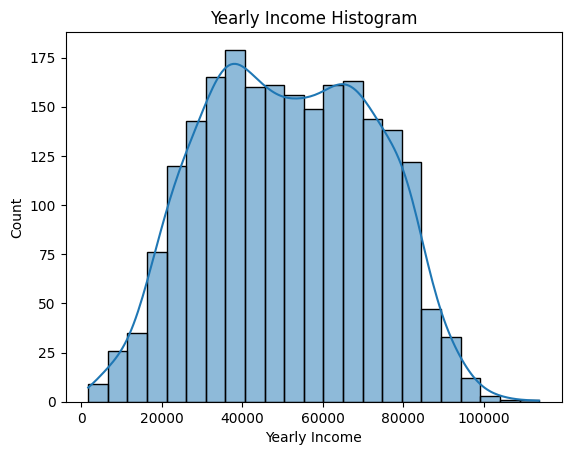

In [40]:
# Create an Histogram Plot for Yearly Income with Kernel Density Estimate (KDE) Plot

sns.histplot(data=df, x="Yearly_Income", kde = 'True')
plt.title("Yearly Income Histogram")
plt.xlabel("Yearly Income")
plt.ylabel("Count")
print()

# An histogram graph for income was created to be able to
# understand the descriptives. We can say from the graph that it is normally distributed.

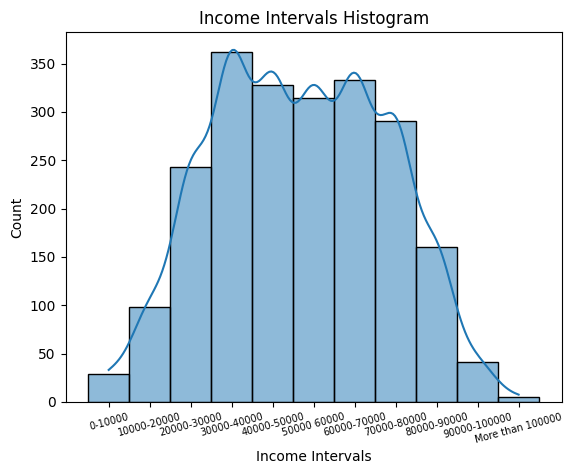

In [41]:
# Create an Histogram Plot for Income Intervals

sns.histplot(data=df, x="Income_Intervals", kde = 'True')
plt.title("Income Intervals Histogram")
plt.xlabel("Income Intervals")
plt.ylabel("Count")
plt.xticks(rotation = 15, fontsize = 7)
print()

# An histogram graph for income intervals was created to be able to
# understand the descriptives. We can say from the graph that it is normally distributed.

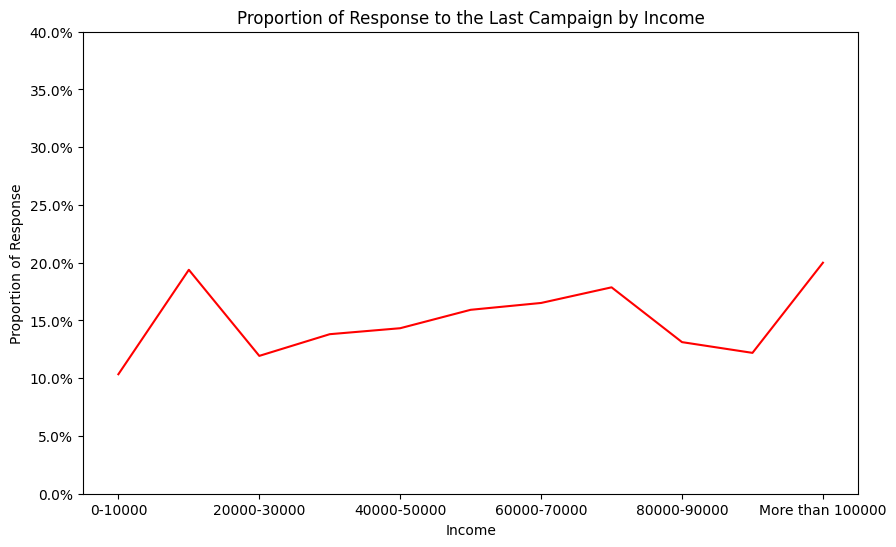

In [42]:
# Calculate proportion of response to the last campaign by Income'

response_counts_by_income = df.groupby('Income_Intervals')['Response'].sum()

total_response_by_income = df.groupby('Income_Intervals')['Response'].count()

response_proportion_by_income = response_counts_by_income / total_response_by_income

# Create a bar plot
plt.figure(figsize=(10, 6))
response_proportion_by_income.plot(kind='line', color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # Set the maximum value for percentage
plt.title('Proportion of Response to the Last Campaign by Income')
plt.xlabel('Income')
plt.ylabel('Proportion of Response')
plt.ylim(0, 0.40)
plt.show()

# The proportion of positive responses to the last campaign according to the income
# were calculated as part of an explorative analysis. It was shown with a bar plot.

In [43]:
# Identify if there is a statisticaly significant correlation between
# Yearly Income and Total Acceptance of the Campaigns


corr, p_value = pointbiserialr(df['Yearly_Income'], df['Total_Acceptance'])

print(f"Point-Biserial Correlation: {corr}")
print(f"P-value: {p_value}")


# Point-Biserial Correlation was implemented to see if there is a relationship
# between yearly income and total acceptance of the campaigns. p value is < 0.05,
# therefore, it can be conluded there is a significant
# relationship between age and total acceptance of the campaigns.

Point-Biserial Correlation: 0.3649463283700458
P-value: 2.1062624883712603e-70


Complaint_Last_Two_Years
0    2183
1      21
Name: count, dtype: int64


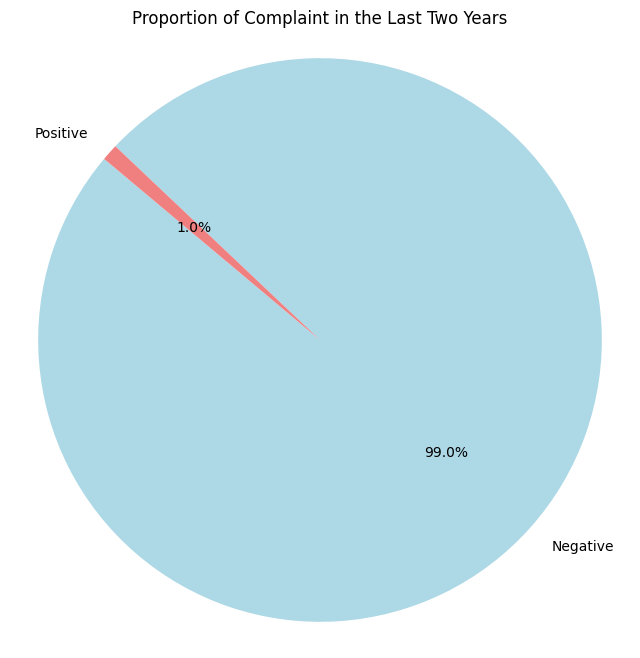

In [44]:
# Calculate the proportion of complaints for the last two years


overall_counts = df.Complaint_Last_Two_Years.value_counts()

print(overall_counts)

response_proportion = overall_counts[1] / overall_counts.sum()

# Create a pie chart
labels = ['Negative', 'Positive']
sizes = [overall_counts[0], overall_counts[1]]
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Complaint in the Last Two Years')
plt.axis('equal')
plt.show()

# The proportion of complaints for the last two years were calculated. We
# can see that only %1 of the customers have complained in the last two years.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(1617.996, 12930.4]'),
  Text(1, 0, '(12930.4, 24130.8]'),
  Text(2, 0, '(24130.8, 35331.2]'),
  Text(3, 0, '(35331.2, 46531.6]'),
  Text(4, 0, '(46531.6, 57732.0]'),
  Text(5, 0, '(57732.0, 68932.4]'),
  Text(6, 0, '(68932.4, 80132.8]'),
  Text(7, 0, '(80132.8, 91333.2]'),
  Text(8, 0, '(91333.2, 102533.6]'),
  Text(9, 0, '(102533.6, 113734.0]')])

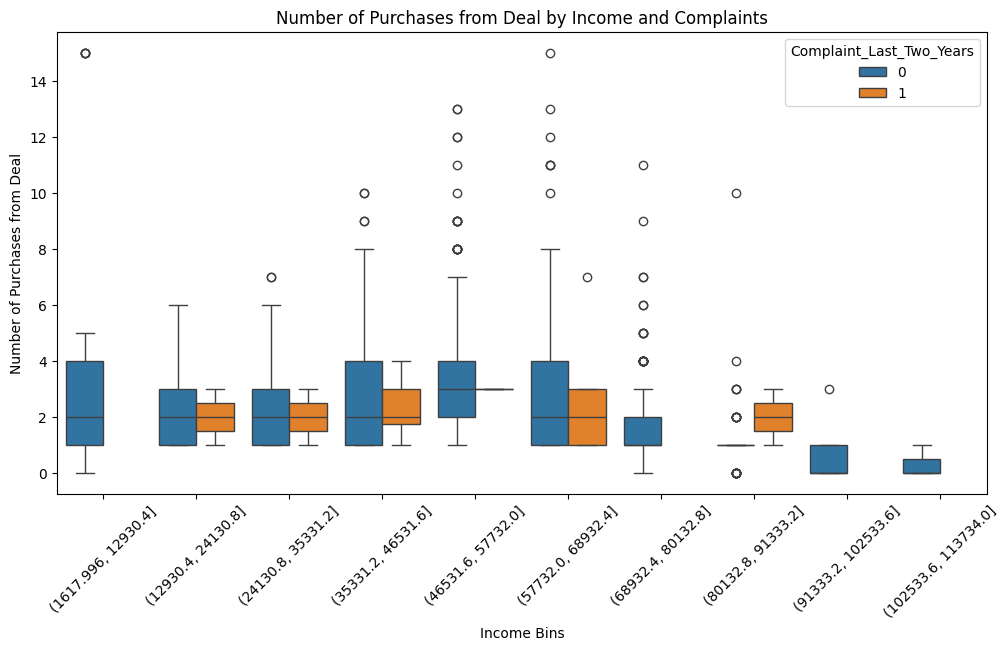

In [45]:
# Visualize the distribution of the number of purchases from deals for different income levels,
# split by whether the customer has complaints.

df['Income_Bin'] = pd.cut(df['Yearly_Income'], bins=10)

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Income_Bin", y="NumDealsPurchases", hue="Complaint_Last_Two_Years", data=df)
plt.title('Number of Purchases from Deal by Income and Complaints')
plt.xlabel('Income Bins')
plt.ylabel('Number of Purchases from Deal')
plt.xticks(rotation=45)

# Distribution of the number of purchases from deals for different income levels,
# split by whether the customer has complaints was visualized by using box plot.

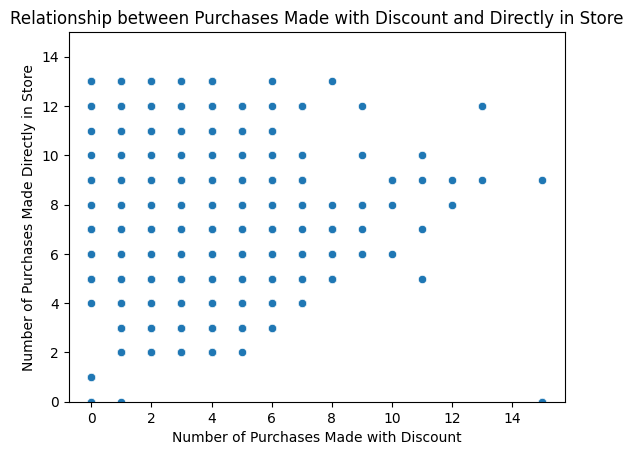

In [46]:
# Show the relationship between Purchases Made with Discount
# and Directly in Store by using Scatterplot

sns.scatterplot(x="NumDealsPurchases", y="NumStorePurchases", sizes=(10, 100), data=df)

plt.xlabel("Number of Purchases Made with Discount")

plt.ylabel("Number of Purchases Made Directly in Store")

plt.title("Relationship between Purchases Made with Discount and Directly in Store")

plt.ylim(0,15)

# display the plot

plt.show()

# The relationship between Purchases Made with Discount and Directly in Store
# was shown by using Scatterplot for the explorative analysis. We can see
# from the graph that there is no direct relationship between them.

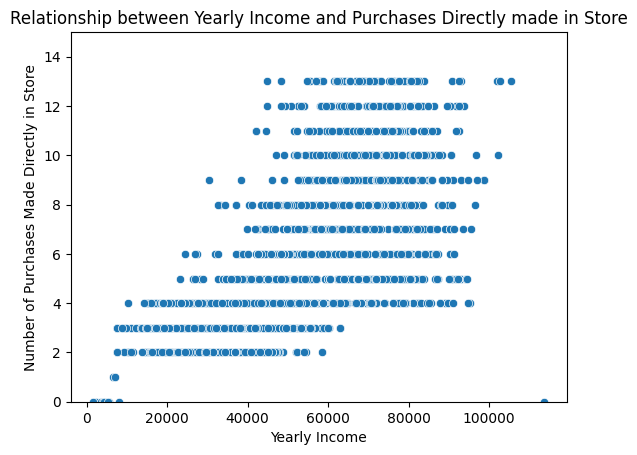

In [47]:
# Show the relationship between Yearly Income and Purchases Directly made in Store
# by using Scatterplot

sns.scatterplot(x="Yearly_Income", y="NumStorePurchases", sizes=(10, 100), data=df)

plt.xlabel("Yearly Income")

plt.ylabel("Number of Purchases Made Directly in Store")

plt.title("Relationship between Yearly Income and Purchases Directly made in Store")

plt.ylim(0,15)

plt.show()

# The relationship between Yearly Income and Purchases Directly made in Store
# was shown by using Scatterplot for the explorative analysis. We can see
# from the graph that there might be a positive relationship between them.

In [48]:
# Means of Yearly Income grouping by Marital Status

df.groupby('Marital_Status').Yearly_Income.mean()

# Means of yearly income grouping by marital status were shown
# for the explorative analysis purposes. It can be seen that
# widowed customers have higher income mean compared to the other groups.

Marital_Status
Divorced    52396.610390
Married     51350.511710
Single      50919.703158
Together    51553.198944
Widow       56481.552632
Name: Yearly_Income, dtype: float64

In [49]:
# Means of Store Purchases grouping by Income Intervals

df.groupby('Income_Intervals').NumStorePurchases.mean()

# Means of store purchases grouping by marital status were shown
# for the explorative analysis purposes. It can be seen that
# the higher income group have higher number of store purchases.

Income_Intervals
0-10000             5.275862
10000-20000         6.112245
20000-30000         5.530864
30000-40000         5.994475
40000-50000         5.902439
50000 60000         5.589172
60000-70000         6.000000
70000-80000         5.841924
80000-90000         5.850000
90000-100000        4.951220
More than 100000    7.200000
Name: NumStorePurchases, dtype: float64

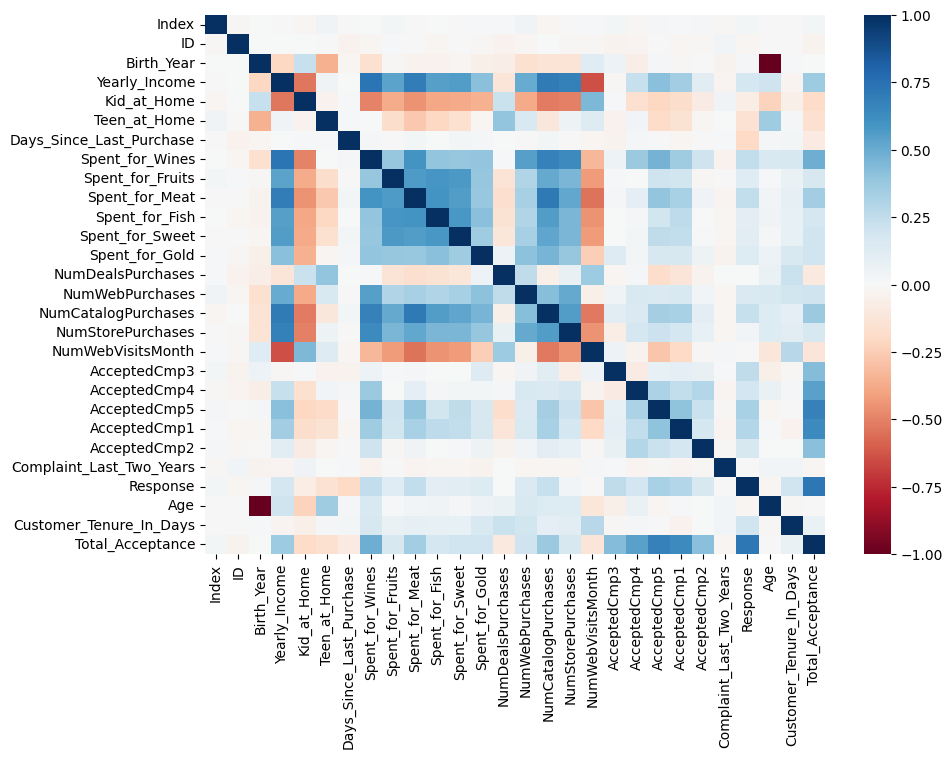

In [50]:
# Create a Correlation Map with Heatmap

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='RdBu')

plt.show()

# Correlation Map with Heatmap was created to understand the correlation between columns.
# It can be interpreted that, there is a strong negative correlation between yearly income and
# monthly number of web visits. Also, yearly income seems to be negatively correlated with
# number of kids at home. In general, amount of money spent for products seems to be
# positively correlated to each other. These are examples of some of the results that can be
# inferred from the correlation map.


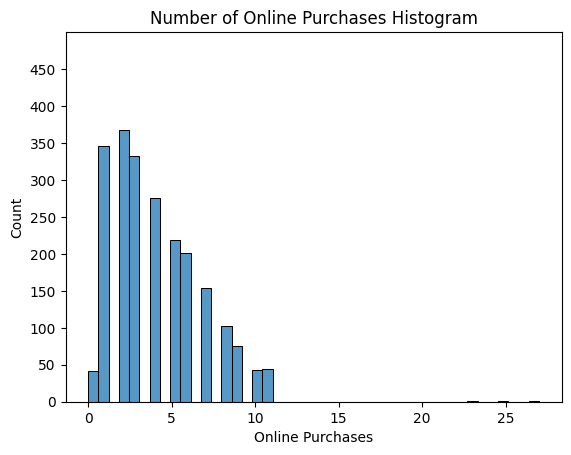

In [51]:
# Create an Histogram Graph for Number of Online Purchases

sns.histplot(data=df, x="NumWebPurchases")
plt.title("Number of Online Purchases Histogram")
plt.xlabel("Online Purchases")
plt.ylabel("Count")
plt.ylim(0, 500)
plt.yticks(range(0,500,50))
min_value = df['NumWebPurchases'].min()
print()

# An histogram graph for Number of Online Purchases created.
# The outliers were dedected, it might be good idea to see how the
# histogram graph will look after dealing with outliers. Therefore
# it might be appropriate step to implement Box-Cox.


Lambda value used for Box-Cox transformation: 0.1934693489374962


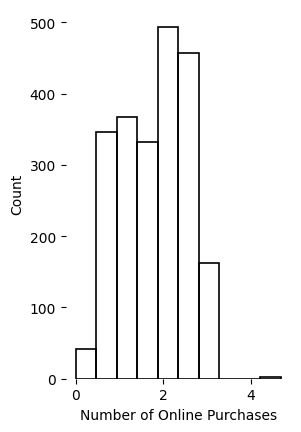

In [52]:
# Get normal distribution of online purchases by using Box-Cox

min_value = df['NumWebPurchases'].min()

if min_value <= 0:
    shift = abs(min_value) + 1
    df['NumWebPurchases'] = df['NumWebPurchases'] + shift

# Apply the Box-Cox transformation
dts_bc, lmda = stats.boxcox(df['NumWebPurchases'])

print(f"Lambda value used for Box-Cox transformation: {lmda}")

plt.subplot(1,2,2)
plt.hist(dts_bc,
         edgecolor='k',
         facecolor='none',
         linewidth=1.2)
plt.xlabel('Number of Online Purchases')
plt.ylabel('Count')
plt.box(False)

# A normal distribution graph was created after finding lambda value
# to use for Box-Cox transformation and implementing Box-Cox.